# 3.5.1 Mixturas de Gaussianas

**Gaussian mixture model (GMM) o  mixture of Gaussians (MoG):**
$$p(\boldsymbol{y}\mid\boldsymbol{\theta})=\sum_{k=1}^K\pi_k\,\mathcal{N}(\boldsymbol{y}\mid\boldsymbol{\mu}_k,\mathbf{\Sigma}_k)$$

**Ejemplo:** $\;K=3;\quad\pi_1=0.5,\,\pi_2=0.4,\,\pi_3=0.2$
$$\begin{align*}
\boldsymbol{\mu}_1&=\begin{pmatrix}0.22\\0.45\end{pmatrix}%
&\boldsymbol{\mu}_2&=\begin{pmatrix}0.50\\0.50\end{pmatrix}%
&\boldsymbol{\mu}_3&=\begin{pmatrix}0.77\\0.55\end{pmatrix}\\%
\mathbf{\Sigma}_1&=\begin{pmatrix}0.011&-0.01\\-0.01&0.018\end{pmatrix}%
&\mathbf{\Sigma}_2&=\begin{pmatrix}0.018&0.01\\0.01&0.011\end{pmatrix}%
&\mathbf{\Sigma}_3&=\mathbf{\Sigma}_1%
\end{align*}$$

In [1]:
import numpy as np; from scipy.stats import multivariate_normal; import matplotlib.pyplot as plt

In [2]:
def plot_GMM2d(ax, x, y, pi, mu, Sigma, levels=10, shrink=0.8):
    X, Y = np.meshgrid(x, y); XY = np.c_[np.ravel(X), np.ravel(Y)]
    p = lambda x: sum(pi[k] * multivariate_normal(mu[k], Sigma[k]).pdf(x) for k in range(len(pi)))
    P = np.apply_along_axis(p, 1, XY)
    ax.contour(X, Y, P.reshape(X.shape), levels=levels, colors='orange')
    cp = ax.contourf(X, Y, P.reshape(X.shape), levels, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=shrink)

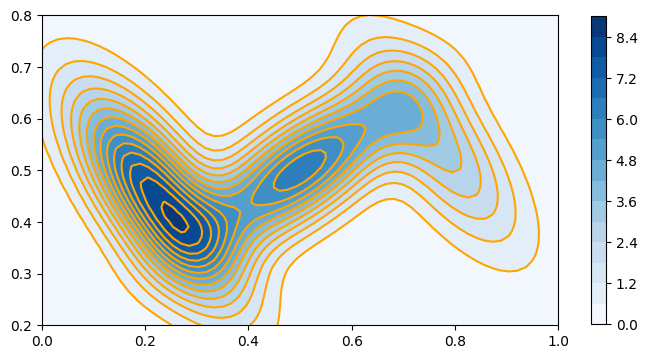

In [3]:
K = 3; pi = np.array([0.5, 0.4, 0.2]).astype(float)
mu = np.array([[0.22, 0.45], [0.5, 0.5], [0.77, 0.55]]).astype(float)
Sigma = np.array([[[0.011, -0.01], [-0.01, 0.018]], [[0.018, 0.01], [0.01, 0.011]], 
[[0.011, -0.01], [-0.01, 0.018]]]).astype(float)
x, y = np.linspace(0.0, 1.0, num=64), np.linspace(0.2, 0.8, num=64)
fig, ax = plt.subplots(1, 1, figsize=(5/0.6, 5)); ax.set(aspect='equal')
plot_GMM2d(ax, x, y, pi, mu, Sigma, levels=15)

**Aplicación en clustering:** $\;$ los GMM se suelen aplicar en **clustering** de un conjunto de datos $\,\mathcal{D}=\{\boldsymbol{y}_1,\dotsc,\boldsymbol{y}_N\}$
* **MLE de parámetros:** $\;$ primero se halla el MLE de los parámetros desconocidos, $\,\hat{\boldsymbol{\theta}}=\operatorname{argmax}\;\log p(\mathcal{D}\mid\boldsymbol{\theta})$
* **Etiquetas de clúster:** $\;$ cada $\boldsymbol{y}_n$ se asocia con una variable latente $z_n\in\{1,\dotsc,K\}$ que identifica el clúster del que procede
* **Responsabilidad:** $\;$ del clúster $k$ para el dato $\boldsymbol{y}_n,\,r_{nk}=p(z_n=k\mid\boldsymbol{y}_n,\hat{\boldsymbol{\theta}})$
* **Hard clustering:** $\;$ asocia cada dato al clúster más responsable, $\,\hat{z}_n=\operatorname{argmax_k}\;r_{nk}$
* **Ejemplo:** $\;$ ver el ejemplo de la sección 1.3.1